In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Sistemas Dinamicos

Un sistema dinamico es un sistema cuyo <b>estado</b> esta unicamente especificado por un conjunto de variables y su <b>comportamtiento</b> esta definido por un conjunto de reglas.

<b>Ejemplos</b>:
- Crecimiento de poblacion.
- Pendulo.
- Movimiento de planetas.
- Sistema financiero.

### Sistema Discreto

Este tipo de modelo es llamado <b>ecuacion de diferencias</b>

$$
x_t = F(x_{t-1}, t)
$$

### Sistema Continuo

Este tipo de modelo es llamado <b>ecuacion diferenncial</b>

$$
\frac{dx}{dt} = F(x,t)
$$

<hr>

## Clasificaciones

### Lineal o no lineal

Un sistema es no lineal cuando posee variables de estado multiplicandose.

<b>Ejemplo</b> lineal:

$$
x_t = 2 x_{t-1}
$$

<b>Ejemplo</b> no lineal:

$$
x_t = 2 x_{t-1} y_{t-1}
$$

### Orden

Un sistema puede ser, de primer orden, segundo, tercero, etc. Dependiendo de si para calcular el estado actual $t$ dependende de uno, dos, tres, estados anteriores.

<b>Ejemplo</b> primer orden:

$$
x_t = 2 t_{t-1}
$$

<b>Ejemplo</b> segundo orden:

$$
x_t = 2 x_{t-1} + x_{t-2}
$$

### Autonomo o no autonomo

Un sistema es no autonomo, cuando aparece la variable tiempo de forma explicita.

<b>Ejemplo</b> autonomo:

$$
x_t = 2 x_{t-1}
$$

<b>Ejemplo</b> no autonomo:

$$
x_t = 2 t x_{t-1}
$$

<hr>

## Punto de Equilibrio

Son los puntos donde el sistema deja de pregresar, cuando ocurre que el estado siguiente es el mismo que el anterior. Matematicamente en un sistema discreto esto se expresa de la siguiente manera:

$$
x_{t + 1} = x_t
$$

## Espacio de Fases

El espacio de fases es el conjunto de los diferentes estados posibles, cualquier estado en el sistema se representa por un punto en el estado de fases.

Un sistema dinamico evoluciona en el tiempo como una <b>trayectoria</b> en el espacio de fases.

### Comportamiento de las trayectorias

- Diverger al infinito.
- Converger a un <b>punto</b> fijo estable.
- Oscilar al rededor de un <b>punto</b>.

A estos puntos de los ultimos dos items se los denomina <b>atractor</b>.

<b>Cuenca del atractor</b>: conjunto de puntos en el espacio de fases que llevan a un atractor.

<img src="imagenes/comportamiento_trayectorias.png" width="500" />

## Comportamiento en Sistemas Lineales

Podemos lograr conocer el comportamiento asintotico, mediante el estudio de los autovalores.

Si el autovalor dominante $\lambda_d$ en modulo es mayor a 1. Entonces el sistema <b>diverge</b>.

<b>Nota</b>: tienen un unico punto fijo. 

#### Ejemplo

Teniendo el siguiente <b>Sistema Dinamico</b>:

$$
x_t = x_{t - 1} - y_{t - 1}
$$

$$
y_t = -x_{t - 1} - 3y_{t - 1} + z_{t - 1}
$$

$$
z_t = y_{t - 1} + z_{t - 1}
$$

Construimos la <b>matriz</b>

$$
A=
\begin{bmatrix}
1  & -1 & 0 \\
-1 & -3 & 1 \\
0  &  1 & 1 \\
\end{bmatrix}
$$

Calculamos los <b>autovalores</b>

$$
det(A - \lambda I) = 0
$$

In [25]:
import numpy as np
m = np.matrix('1 -1 0 ; -1 -3 1 ; 0 1 1')
m

matrix([[ 1, -1,  0],
        [-1, -3,  1],
        [ 0,  1,  1]])

In [26]:
autovalores = np.linalg.eigvals(m)
autovalores

array([-3.44948974,  1.        ,  1.44948974])

Nos quedamos con el autovalor, <b>dominante</b> (en modulo)

In [9]:
abs(autovalores[0])

3.4494897427831788

Como es mayor a 1, entonces el sistema <b>diverge</b>

## Comportamiento Local en Sistemas No Lineales

Cuando el sistema es no lineal, la matematica para encontrar el comportamiento cambia, debemos encontrar los puntos fijos. Crear la matriz jacobiana y evaluar estos puntos en ella.

<b>Observacion</b>: lo que se estudia es el comportamiento <b>local</b>, es decir en un entorno reducido al rededor del punto.

<img src="imagenes/estudio_local_punto_fijo_sistema_no_lineal.png" />

Entonces:

1) Encontramos los puntos de equilibrio plenteando $x_{t-1} = x_t = x$.

2) Calculamos la <b>matriz Jacobiana</b>.

Ejemplo caso de dos ecuaciones.

$$
J =
\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy} \\
\frac{dg}{dx} & \frac{dg}{dy} \\
\end{bmatrix} 
$$

3) Evaluamos los puntos de equilibrio en la matriz jacobiana.

4) Calculamos y analizamos los autovalores. Y los clasificamos mediante la siguiente tabla:

### Discreto 

<img src="imagenes/comportamiento_no_lineal_discreto.png" />

### Continuo

<img src="imagenes/comportamiento_no_lineal_continuo.png" />

### Ejemplo caso Discreto

$$
x_t = x_{t - 1} y_{t - 1}
$$

$$
y_t = y_{t - 1} (x_{t - 1} - 1) 
$$

<b>Observacion</b>: notar que no es un sistema lineal. Hay dos variables que se estan multiplicando.

1) Buscamos los <b>puntos de equilibrio</b>:

$$
x_t = x_{t - 1} = x
$$

$$
y_t = y_{t - 1} = y
$$

Remplazando en el sistema:

$$
x = x y
$$

$$
y = y(x - 1)
$$

(0, 0) es una solucion

(1, 1) es la otra

Por lo tanto los dos puntos de equilibrio son: $(0,0)$ y $(1,1)$

2) Calculamos la matriz <b>jacobiana</b>

$$
f(x,y) = xy
$$
$$
g(x,y) = y(x - 1) = yx - y
$$

$$
J(x,y) =
\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy} \\
\frac{dg}{dx} & \frac{dg}{dy} \\
\end{bmatrix}
$$

$$
J(x,y) =
\begin{bmatrix}
y & x \\
y & x - 1 \\
\end{bmatrix}
$$

3) Evaluamos el jacobiano en en los puntos de equilibrio, y calculamos los autovalores. Y clasificamos al punto.

Estudio del $(0,0)$

$$
J(0,0) =
\begin{bmatrix}
0 & 0 \\
0 & -1 \\
\end{bmatrix}
$$

In [10]:
m = np.matrix('0 0 ; 0 -1')
m

matrix([[ 0,  0],
        [ 0, -1]])

In [12]:
autovalores = np.linalg.eigvals(m)
autovalores

array([ 0., -1.])

De los dos autovalores el dominante es $$|\lambda_d| = 1$$

Por lo tanto el comportamiento local de este punto es el de un <b>Lyapunov stable</b>, <b>neutral point</b>

<img src="imagenes/comportamiento_neutral_point.png" />

Estudio del $(1,1)$

$$
J(1,1) =
\begin{bmatrix}
1 & 1 \\
1 & 0 \\
\end{bmatrix}
$$

In [18]:
m = np.matrix('1 1 ; 1 0')
m

matrix([[1, 1],
        [1, 0]])

In [17]:
autovalores = np.linalg.eigvals(m)
autovalores

array([ 1., -1.])

De los dos autovalores el dominante es $$|\lambda_d| = 1.618$$

Por lo tanto el comportamiento local de este punto es el de un <b>Unstable</b>.

Luego como un autovalor en modulo es mayor a 1 y otro en modulo menor a 1 es un <b>saddle point</b>.

<img src="imagenes/comportamiento_saddle_point.png" />

### Ejemplo caso Continuo

$$
\frac{dx}{dt} = x - xy
$$

$$
\frac{dy}{dt} = -y + xy
$$

1) Buscamos los <b>puntos de equilibrio</b>:

Para esto se plantea:

$$
\frac{dx}{dt} = 0
$$

$$
\frac{dy}{dt} = 0
$$

$$
x = xy
$$

$$
y = xy
$$

Una solucion es $(0,0)$, y la otra es $(1,1)$

2) Calculamos la matriz <b>jacobiana</b>

$$
f(x,y) = x - xy
$$
$$
g(x,y) = -y + xy
$$

$$
J(x,y) =
\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy} \\
\frac{dg}{dx} & \frac{dg}{dy} \\
\end{bmatrix}
$$

$$
J(x,y) =
\begin{bmatrix}
1 - y & -x \\
y & -1 + x \\
\end{bmatrix}
$$

Arrancamos con el $(0,0)$

$$
J(0,0) =
\begin{bmatrix}
1 & 0  \\
0 & -1 \\
\end{bmatrix}
$$

In [15]:
m = np.matrix('1 0 ; 0 -1')
m

matrix([[ 1,  0],
        [ 0, -1]])

In [16]:
autovalores = np.linalg.eigvals(m)
autovalores

array([ 1., -1.])

Tenemos un autovalor mayor a 0 y otro menor a 0, por lo tanto es un <b>unstable, saddle point</b>

Seguimos con el (1,1)

$$
J(x,y) =
\begin{bmatrix}
0 & -1 \\
1 & 0 \\
\end{bmatrix}
$$

In [19]:
m = np.matrix('0 -1 ; 1 0')
m

matrix([[ 0, -1],
        [ 1,  0]])

In [20]:
autovalores = np.linalg.eigvals(m)
autovalores

array([0.+1.j, 0.-1.j])

Nos dieron autovalores complejos conjugados. Ambos con parte real igual a cero, por lo tanto es un punto <b>Lyapunov stable, neutral center</b>

In [23]:
import matplotlib.pyplot as plt

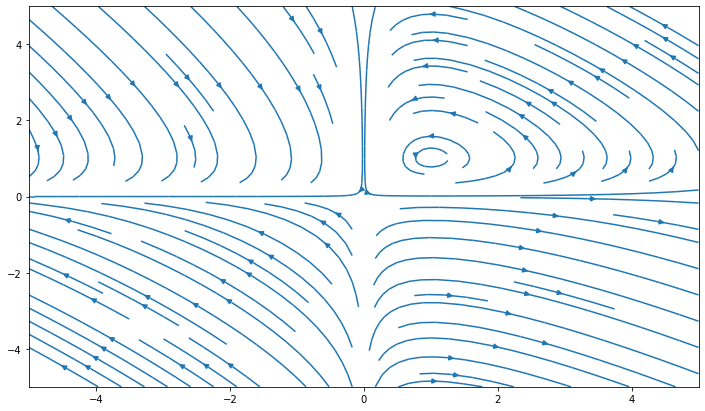

In [24]:
a = 5

Y, X = np.mgrid[-a:a:100j, -a:a:100j]
U = X - X * Y
V = X * Y - Y

fig = plt.figure(figsize = (12, 7))
plt.streamplot(X, Y, U, V, density = 1)
plt.show()

Vemos como en el $(1,1)$ esta el punto <b>neural center</b>

Vemos como en el (0,0) esta <b>saddle point</b>

# Bifurcaciones

Los sistemas dinamicos no-lineales a veces presentan cambios radicales en su comportamiento (dinamica) con pequeños cambios de los parametros del sistema.

Tipos de bifurcaciones:

- Bifurcaciones <b>locales</b>.
- Bifurcaciones <b>globales</b>.

### Bifurcaciones locales

Estas bifurcaciones ocurren cuando la estabilidad de un punto fijo cambia de <b>estable</b> a <b>inestable</b>, o viceversa.

Cuando los autovalores de la matriz jacobiana... COMPLETAR

#### Una dimension tiempo continuo

$$
\frac{dx}{dt} = F(x)
$$

Condicion de bifurcacion:

Para $x = x_{eq}$

$$
\frac{Re(dF)}{dx} = 0
$$

#### Ejemplo 1

$$
\frac{dx}{dt} = r - x^2
$$

Buscamos los <b>puntos fijos</b>:

$$
\frac{dx}{dt} = 0
$$

$$
r - x^2 = 0
$$

Soluciones:

$$
x_1 = \sqrt r
$$

$$
x_2 = - \sqrt r
$$

Tenemos dos puntos fijos.

Analicemos la <b>estabilidad</b> de los puntos mediante los <b>autovalores</b>.

Autovalores:

$$
f(x) = r - x^2
$$

$$
J(x) =
\begin{bmatrix}
\frac{df(x)}{dx} \\
\end{bmatrix} 
$$

$$
J(x) =
\begin{bmatrix}
-2x \\
\end{bmatrix} 
$$

Evaluamos los puntos fijo en la matriz jacobiana.

$x_1 = \sqrt r$

$$
J(\sqrt r) =
\begin{bmatrix}
-2 \sqrt r\\
\end{bmatrix} 
$$

Calculamos los autovalores

$$
-2 \sqrt r - \lambda= 0
$$

$$
\lambda = -2 \sqrt r
$$

Vamos a la tabla, vemos que como es menor que cero, es <b>estable</b>.

$x_2 = -\sqrt r$

$$
J(-\sqrt r) =
\begin{bmatrix}
2 \sqrt r\\
\end{bmatrix} 
$$

Calculamos los autovalores

$$
2 \sqrt r - \lambda= 0
$$

$$
\lambda = 2 \sqrt r
$$

Vamos a la tabla, vemos que como es mayor a cero, es <b>inestable</b>.

Resumiendo:

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = \sqrt{r}$|no existe|estable
$x_{eq} = -\sqrt{r}$|no existe|inestable

Ahora vamos a plantear la <b>condicion de bifurcacion</b>:

$$
\frac{Re(df)}{dx} = 0
$$

Donde:

$$
\frac{dF(x)}{dx} = -2x = 0
$$

Evaluamos en los puntos fijos:

$$
\frac{dF(\sqrt r))}{dx} = -2 \sqrt r = 0
$$

$$
r = 0
$$

<img src="imagenes/bifurcacion_comportamiento_local.png" width="400" />

A este tipo de bifurcacion se le llama <b>Saddle Node</b>

#### Ejemplo 2

$$
\frac{dx}{dt} = rx - x^2
$$

Buscamos los <b>puntos fijos</b>:

$$
\frac{dx}{dt} = 0
$$

$$
rx - x^2 = 0
$$

Soluciones $x_1=0$ y $x_2=r$

Analicemos la <b>estabilidad</b> de los puntos mediante los <b>autovalores</b>.

Autovalores:

$$
f(x) = rx - x^2
$$

$$
J(x) =
\begin{bmatrix}
\frac{df(x)}{dx} \\
\end{bmatrix} 
$$

$$
J(x) =
\begin{bmatrix}
r - 2x \\
\end{bmatrix} 
$$

Evaluamos los puntos fijo en la matriz jacobiana.

$x_1 = 0$

$$
J(0) =
\begin{bmatrix}
r \\
\end{bmatrix} 
$$

Calculamos los autovalores

$$
r - \lambda = 0
$$

$$
\lambda = r
$$

Vamos a la tabla, vemos que si es mayor a cero es inestable y si es menor a cero es estable, entonces. Si r es mayor a cero es inestable y si r es menor a cero es estable.

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = 0$|estable|inestable

$x_2 = r$

$$
J(x) =
\begin{bmatrix}
r - 2x \\
\end{bmatrix} 
$$

$$
J(r) =
\begin{bmatrix}
r - 2r \\
\end{bmatrix}
$$

$$
J(r) =
\begin{bmatrix}
- r \\
\end{bmatrix}
$$

Calculamos los autovalores

$$
-r - \lambda = 0
$$

$$
\lambda = -r
$$

Vamos a la tabla, vemos que si es mayor a cero es inestable y si es menor a cero es estable, entonces. Si r es mayor a cero es estable y si r es menor a cero es inestable.

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = r$|inestable|estable

Completando:

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = 0$|estable|inestable
$x_{eq} = r$|inestable|estable

Ahora vamos a plantear la <b>condicion de bifurcacion</b>:

$$
\frac{Re(df(x_{eq}))}{dx} = 0
$$

$$
\frac{Re(df(0))}{dx} = r - 2 * 0 = r
$$

$$
\frac{Re(df(r))}{dx} = r - 2r = -r
$$

En ambos caso de la igualacion al cero da como unico resultado $r=0$

<img src="imagenes/bifurcacion_1.png" width="400" />

A este tipo de bifurcacion se le llama <b>bifurcacion transcritica</b>

#### Ejemplo 3

$$
\frac{dx}{dt} = rx - x^3
$$

Buscamos los <b>puntos fijos</b>:

$$
\frac{dx}{dt} = 0
$$

$$
rx - x^3 = 0
$$

$$
x(r - x^2) = 0
$$

$$
x_1 = 0
$$

$$
r - x^2 = 0
$$

$$
x_1 = \sqrt r
$$

$$
x_2 = - \sqrt r
$$

Soluciones $x_1=0$, $x_2=\sqrt r$ y $x_3=- \sqrt r$

Analicemos la <b>estabilidad</b> de los puntos mediante los <b>autovalores</b>.

$$
f(x) = rx - x^3
$$

$$
J(x) =
\begin{bmatrix}
\frac{df(x)}{dx} \\
\end{bmatrix} 
$$

$$
J(x) =
\begin{bmatrix}
r - 3x^2 \\
\end{bmatrix} 
$$

$x_1 = 0$

$$
J(0) =
\begin{bmatrix}
r \\
\end{bmatrix} 
$$

$$
r - \lambda = 0
$$

$$
\lambda = r
$$

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = 0$|estable|inestable

$x_2 = \sqrt r$

$$
J(\sqrt r) =
\begin{bmatrix}
r - 3(\sqrt r)^2 \\
\end{bmatrix} 
$$

$$
J(\sqrt r) =
\begin{bmatrix}
r - 3r \\
\end{bmatrix} 
$$

$$
J(\sqrt r) =
\begin{bmatrix}
- 2r \\
\end{bmatrix} 
$$

$$
-2r - \lambda = 0
$$

$$
\lambda = -2r
$$

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = \sqrt r$|no existe|estable

$x_2 = - \sqrt r$

$$
J(\sqrt r) =
\begin{bmatrix}
r - 3(-\sqrt r)^2 \\
\end{bmatrix} 
$$

$$
J(\sqrt r) =
\begin{bmatrix}
r - 3r \\
\end{bmatrix} 
$$

$$
J(\sqrt r) =
\begin{bmatrix}
- 2r \\
\end{bmatrix} 
$$

$$
-2r - \lambda = 0
$$

$$
\lambda = -2r
$$

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = -\sqrt r$|no existe|estable

Finalmente:

Punto de equilibrio|r < 0|r > 0|
-|-|-|
$x_{eq} = 0$|estable|inestable
$x_{eq} = \sqrt r$|no existe|estable
$x_{eq} = -\sqrt r$|no existe|estable

Ahora vamos a plantear la <b>condicion de bifurcacion</b>:

$$
\frac{Re(df(x_{eq}))}{dx} = 0
$$

$$
f(e_{eq}) = r - 3x^2
$$

$$
f(0) = r
$$

$$
f(\sqrt r) = r - 3r = -2r
$$

$$
f(-\sqrt r) = r - 3r = -2r
$$

Igualamos cada ecuacion a 0, y nos da en los 3 casos la misma solucion, $r=0$. Esto quiere decir que la bifurcacion es en el 0.

<img src="imagenes/bifurcacion_3.png" width="400" />

Este punto es conocido como <b>Bifurcarcion Pitchfork</b>

#### Condicion de bifurcacion en sistemas discretos:

$$
\frac{df(x_{eq})}{dt} = 1
$$

#### Ejemplo 4

Sea el siguiente sistema discreto

$$
x_t = x_{t-1} + r - x^2_{t-1}
$$

Buscamos los <b>puntos fijos</b>:

$$
x_{t} = x_{t-1} = x
$$

$$
x = x + r - x^2
$$

$$
0 = r - x^2
$$

$$
x^2 = r
$$

Por lo tanto las soluciones son:

$x_1=\sqrt r$ 

$x_2=-\sqrt r$

Ahora vamos a plantear la <b>condicion de bifurcacion</b>:

$$
| \frac{df(x_{eq})}{dt} | = 1
$$

$$
f(x)=x + r - x^2
$$

$$
\frac{df(x)}{dx} = 1 - 2x
$$

Evaluo en el primer punto fijo:

$$
\frac{df(\sqrt r)}{dx} = 1 - 2 \sqrt r
$$

$$
|1 - 2 \sqrt r| = 1
$$

Soluciones:

$r = 0$

$r = 1$

Evaluo en el segundo punto fijo:

$$
\frac{df(- \sqrt r)}{dx} = 1 + 2 \sqrt r
$$

$$
1 + 2 \sqrt r = 1
$$

Solucion $r = 0$

Analicemos la <b>estabilidad</b> de los puntos mediante los <b>autovalores</b>.

$$
x_t = x_{t-1} + r - x^2_{t-1}
$$

$$
f(x) = x + r - x^2
$$

Construimos el Jacobiano:

$$
J(x) = 
\begin{bmatrix}
\frac{df(x)}{dx} \\
\end{bmatrix}
$$

$$
J(x) = 
\begin{bmatrix}
1 - 2x \\
\end{bmatrix}
$$

Evaluamos los puntos fijos en el Jacobiano y buscamos los autovalores:

$\sqrt r$

$$
J(\sqrt r) =
\begin{bmatrix}
1 - 2 \sqrt r
\end{bmatrix}
$$

$$
1 - 2 \sqrt r - \lambda = 0
$$

$$
\lambda = 1 - 2 \sqrt r
$$

Recordar que si lambda es en modulo menor a 1 el punto es estable, sino es inestable.

Punto de equilibrio|r < 0|0 < r < 1|r > 1|
-|-|-|-
$x_{eq} = \sqrt r$|no existe|estable|inestable

$-\sqrt r$

$$
J(-\sqrt r) =
\begin{bmatrix}
1 - 2 (- \sqrt r)
\end{bmatrix}
$$

$$
J(-\sqrt r) =
\begin{bmatrix}
1 + 2 (\sqrt r)
\end{bmatrix}
$$

$$
1 + 2 (\sqrt r) - \lambda = 0
$$

$$
\lambda = 1 + 2 \sqrt r
$$

Punto de equilibrio|r < 0|0 < r < 1|r > 1|
-|-|-|-
$x_{eq} = - \sqrt r$|no existe|inestable|inestable

Finalmente:

Punto de equilibrio|r < 0|0 < r < 1|r > 1|
-|-|-|-
$x_{eq} = \sqrt r$|no existe|estable|inestable
$x_{eq} = - \sqrt r$|no existe|inestable|inestable

# Sistemas Caoticos

Veamos un <b>ejemplo</b>:

$$
x_t = r x_{t - 1} (1 - x_{t - 1})
$$

Este modelo se llama <b>Mapa Logistico</b>, utilizado para explicar la evolucion de poblaciones de individuos. Donde r representa la tasa de crecimiento de la poblacion.

Primero encontremos los puntos de equilibrio.

<b>Puntos con periodo unico</b>. Son los <b>puntos de equilibrio</b>.

$$
x_{t} = x_{t - 1} = x 
$$

$$
x = r x (1 - x) 
$$

$$
x = rx - rx^2
$$

$$
rx^2 + x -rx = 0
$$

$$
x(rx + 1 - r) = 0
$$

Primera solucion que vemos:

$$
x_1 = 0
$$

$$
rx + 1 - r = 0
$$

$$
x_2 = \frac{r - 1}{r}
$$

Vamos a analizar la <b>estabilidad</b>:

$$
f(x) = rx(1 - x)
$$

$$
f(x) = rx - rx^2
$$

$$
J(x) =
\begin{bmatrix}
\frac{df(x)}{dx}
\end{bmatrix}
$$

$$
J(x) =
\begin{bmatrix}
r - 2rx
\end{bmatrix}
$$

$x_1=0$

$$
r - \lambda = 0
$$

$$
\lambda = r
$$

Punto de equilibrio|r < 0|r < 1|r > 1|
-|-|-|-
$x_{eq} = 0$|no existe|estable|inestable

$x_2 = \frac{r - 1}{r}$

$$
r - 2r \frac{r - 1}{r}  - \lambda = 0
$$

$$
r - 2r + 2 - \lambda = 0
$$

$$
\lambda = 2 - r 
$$

Plantiemos $\lambda > 1$

$$
|2 - r| > 1
$$

Se resuelve:

(1)

$$
2 - r > 1
$$

$$
2 - 1 > r
$$

$$
1 > r
$$

O bien, (2)

$$
2 - r < -1
$$

$$
2 + 1 < r
$$

$$
3 < r
$$

Plantiemos $\lambda < 1$

$$
|2 - r| < 1
$$

Se resuelve:

$$
-1 < 2 - r < 1
$$

$$
1 > -2 + r > -1
$$

$$
1 + 2> r > -1 + 2
$$

$$
3> r > 1
$$

Punto de equilibrio|r < 0|r < 1 o r > 3|3 > r > 1|
-|-|-|-
$x_{eq} = \frac{r - 1}{r}$|no existe|inestable|estable

<img src="imagenes/bifurcacion_4.png" width="500" />

<b>Puntos con periodo doble</b>:

$$
x_{t + 1} = x_{t - 1}
$$

El desarrollo matematico es bastante complejo pero se llega a lo siguiente:

<img src="imagenes/bifurcacion_5.png" width="500" />

<img src="imagenes/bifurcacion_6.png" width="500" />

A partir de $r = 3$, si un punto cae en una de las ramas a la iteracion siguiente va a ir a la otra rama, y en la siguiente va a volver a la rama actual. Por eso de decimos que es de periodo doble.

$$
x_t = r x_{t - 1} (1 - x_{t - 1})
$$

#### Simulaciones

#### R < 1

Vemos como la poblacion con el correr de las iteraciones se dirige al 0.

X equilibrio: 0


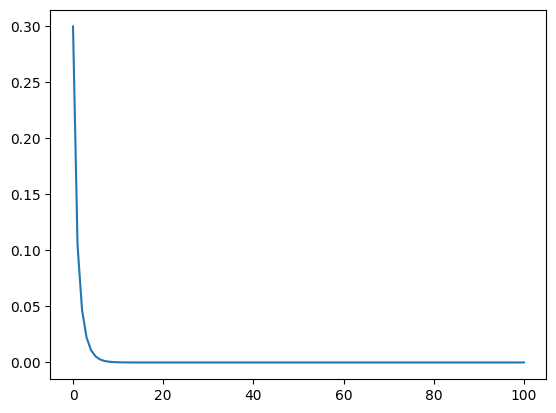

In [212]:
r = 0.5
poblacion = [0.3]

x_eq = 0

print("X equilibrio: {}".format(x_eq))

def f_x(x):
    return r * x * (1 - x)

for _ in range(100):
    latest = poblacion[-1]
    poblacion.append(f_x(latest))

plt.plot(poblacion)
plt.show()

#### 1 < R < 3

Vemos como la poblacion con el correr de las iteraciones se dirige al unico punto de equilibrio.

X equilibrio: 0.5


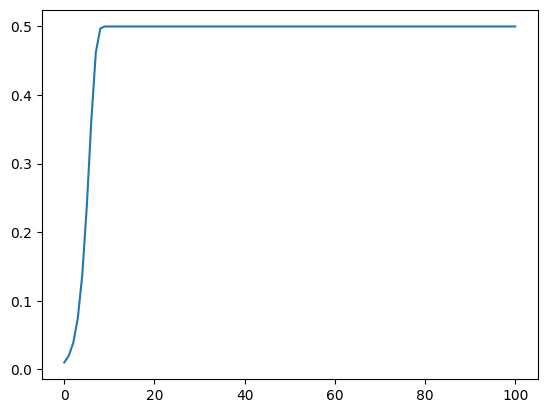

In [215]:
r = 2

x_eq = (r - 1) / r

print("X equilibrio: {}".format(x_eq))

poblacion = [0.01]

def f_x(x):
    return (r * x * (1 - x))

for _ in range(100):
    latest = poblacion[-1]
    poblacion.append(f_x(latest))

plt.plot(poblacion)
plt.show()

#### R < 3

Vemos como con el correr de las iteraciones, la poblacion pasa de un estado al otro, de forma periodica.

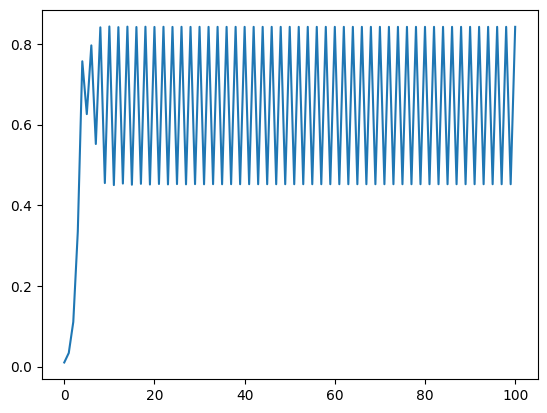

In [222]:
r = 3.4

poblacion = [0.01]

def f_x(x):
    return (r * x * (1 - x))

for _ in range(100):
    latest = poblacion[-1]
    poblacion.append(f_x(latest))

plt.plot(poblacion)
plt.show()

<b>Observacion</b>: A medida que aumentamos r, vemos que el sistema itera periodicamente entre mas estados.

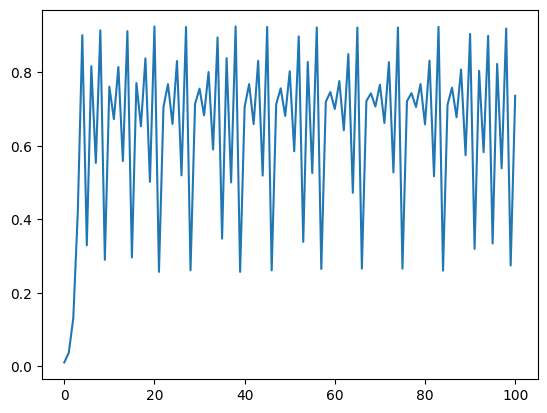

In [221]:
r = 3.7

poblacion = [0.01]

def f_x(x):
    return (r * x * (1 - x))

for _ in range(100):
    latest = poblacion[-1]
    poblacion.append(f_x(latest))

plt.plot(poblacion)
plt.show()